In [10]:
import or_suite

# https://docs.python.org/3/library/tkinter.html
# other option for package
import networkx as nx
import pyglet
import os, sys
import gym

In [11]:
graph = [(0,4,{'travel_time':7}), (0,1,{'travel_time':1}), (1,2,{'travel_time':3}), (2,3,{'travel_time':5}), (1,3,{'travel_time':1}), (1,4,{'travel_time':17}), (3,4,{'travel_time':3})]
graph = nx.Graph(graph)

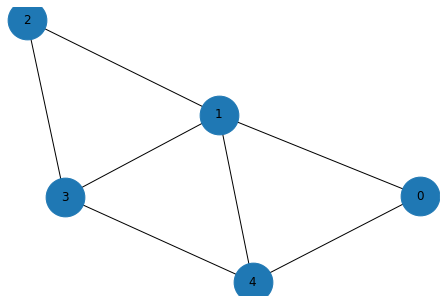

In [14]:
# One option:
"""
    - how to label the nodes: https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_labels.html
    - how to display the ambulances / calls: self.viewer.image(line_x1 + (line_x2 - line_x1)
                              * loc, line_y, ambulance, 0.02)
    - how to display the graph through the render
"""

pos = nx.spring_layout(graph)
c = pos[0][0]
nx.draw(graph, pos, node_size=1500, with_labels = True)
ambulance = pyglet.image.load('./or_suite/envs/ambulance/images/ambulance.jpg')


In [19]:
viewer = or_suite.envs.rendering.PygletWindow(850, 550)


KeyboardInterrupt: 

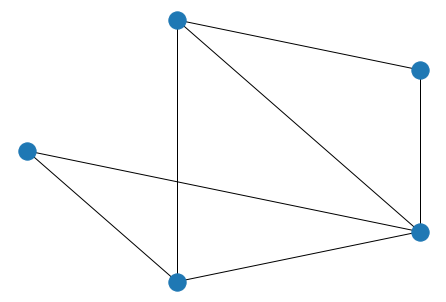

In [4]:
nx.draw_shell(graph)

In [8]:
import or_suite
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import rendering

import time
import copy

env = gym.make('Ambulance-v1')
env.render()


Exception ignored on calling ctypes callback function: <function Win32Window._get_window_proc.<locals>.f at 0x000001AD44C16700>
Traceback (most recent call last):
  File "c:\users\jiaol\anaconda3\envs\orsuite\lib\site-packages\pyglet\window\win32\__init__.py", line 715, in f
    def f(hwnd, msg, wParam, lParam):
KeyboardInterrupt: 


KeyboardInterrupt: 

In [1]:
#from pyvirtualdisplay import Display
#display = Display(visible=0, size=(500, 800))
#display.start()

import or_suite
import gym
import numpy as np
import matplotlib.pyplot as plt
from IPython import display as ipythondisplay
import rendering

import time
import copy

a = 5
b = 2

CONFIG = {'epLen': 5,
    'arrival_dist': lambda x : np.random.beta(5,2),
    'alpha': 0.25,
    'starting_state': np.array([0.0]),
    'num_ambulance': 1,
    'norm': 1
  }

alpha = CONFIG['alpha']
epLen = CONFIG['epLen']
state = CONFIG['starting_state']
num_ambulance = CONFIG['num_ambulance']

agent = or_suite.agents.ambulance.command_line_metric.commandLineAgent(epLen)
env = gym.make('Ambulance-v1')
env.reset()

done = False
your_rewards = []
heuristic_agent_rewards = []
your_total_reward = 0
heuristic_agent_total_reward = 0

median_est = (a - 1/3)/(a + b - 2/3)
heuristic_agent_states = [state]

x_axis = ['Your Reward So Far', 'RL Algorithm Reward So Far']


def display_animation(screen, time_to_display):
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    if time_to_display is not None:
        ipythondisplay.display(plt.gcf())
        time.sleep(time_to_display)

def plot_rewards():
    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    y_axis = [your_total_reward, heuristic_agent_total_reward]
    ax.bar(x_axis, y_axis)
    plt.show()


while not done:
    action = agent.greedy(state, 0)
    
    state, reward, done, info = env.step(action)
    your_rewards.append(reward)
    your_total_reward += reward

    # by comparing the final state with the action the user chose, we can figure out where the most recent arrival was
    previous_arrival_ind = np.argmax(np.abs(action - state))
    previous_arrival = state[previous_arrival_ind]

    # the heuristic agent always chooses to put all the ambulances at the median estimate
    heuristic_agent_action = np.full(num_ambulance, median_est)

    # the state will have one ambulance where the call arrived, and all other ambulances at the median estimate
    # doesn't matter which ambulance responds to the call because they're all at the same place
    heuristic_agent_state = np.concatenate([np.full(num_ambulance - 1, median_est), [previous_arrival]])
    heuristic_agent_states.append(heuristic_agent_state)

    heuristic_agent_reward = -1 * (alpha * np.sum(np.abs(heuristic_agent_states[-2] - heuristic_agent_action)) + (1 - alpha) * np.sum(np.abs(heuristic_agent_action - heuristic_agent_state)))
    heuristic_agent_rewards.append(heuristic_agent_reward)
    heuristic_agent_total_reward += heuristic_agent_reward
    
    env.viewer = rendering.PygletWindow(850, 550)
    env.viewer.window.set_visible(False)
    screen1, screen2, screen3 = env.render(mode='rgb_array')
    
    # display each step of the environment for 2 seconds
    display_animation(screen1, 2)
    display_animation(screen2, 2)
    display_animation(screen3, None)

    # plot your reward vs the agent's reward
    plot_rewards()
    time.sleep(2)

    print("\nThe most recent call arrival was at " + str(previous_arrival) + ", and ambulance " + str(previous_arrival_ind+1) + " responded to the call.\n")

    time.sleep(2)
    
    if not done:
        cont = input("Continue? [y/n]")
        if cont == "n":
            done = True
            break


ipythondisplay.clear_output(wait=True)
env.close()

if np.sum(your_rewards) > np.sum(heuristic_agent_rewards):
    print("CONGRATS! You beat the RL algorithm.")
else:
    print("You did not get a better reward than the RL algorithm.")

print("\nYour total reward over all iterations was ", round(sum(your_rewards),3))
print("The RL algorithm's total reward over all iterations was ", round(sum(heuristic_agent_rewards),3), "\n")

plot_rewards()

KeyboardInterrupt: Interrupted by user

In [6]:
import or_suite
import gym
import rendering
import time

env = gym.make('Ambulance-v1')
env.reset()

screen1, screen2, screen3 = env.render(mode='rgb_array')

def display_animation(screen, time_to_display):
    plt.imshow(screen)
    ipythondisplay.clear_output(wait=True)
    if time_to_display is not None:
        ipythondisplay.display(plt.gcf())
        time.sleep(time_to_display)


display_animation(screen1, 2)
display_animation(screen2, 2)
display_animation(screen3, None)

env.close()

KeyboardInterrupt: 